In [91]:
import pandas as pd
import numpy as np

In [92]:
s = pd.Series([1,2,3,4], index=['a','b', 'c', 'd'])
print(s)

a    1
b    2
c    3
d    4
dtype: int64


In [93]:
s.values      # valores (array de NumPy)


array([1, 2, 3, 4])

In [94]:
s.index       # índices


Index(['a', 'b', 'c', 'd'], dtype='object')

In [95]:
s.dtype       # tipo de datos


dtype('int64')

In [96]:
s.mean()

np.float64(2.5)

In [97]:
data = {
    "name": ["Alice", "Bob", "Charlie"],
    "age": [25, 30, 35],
    "city": ["Madrid", "Lima", "México"]
}
df = pd.DataFrame(data)
print(df)

      name  age    city
0    Alice   25  Madrid
1      Bob   30    Lima
2  Charlie   35  México


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     3 non-null      int64 
 2   city    3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


In [99]:
df.describe()

age
count   3.0
mean   30.0
std     5.0
min    25.0
25%    27.5
50%    30.0
75%    32.5
max    35.0

In [100]:
df.shape

(3, 3)

In [101]:
df.columns

Index(['name', 'age', 'city'], dtype='object')

In [102]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [103]:
df[["name",'city']]

name    city
0    Alice  Madrid
1      Bob    Lima
2  Charlie  México

In [104]:
df.loc[0,'name']

'Alice'

In [105]:
df.iloc[0]

name     Alice
age         25
city    Madrid
Name: 0, dtype: object

In [106]:
df.iloc[0:2,1:3]

age    city
0   25  Madrid
1   30    Lima

In [107]:
df

name  age    city
0    Alice   25  Madrid
1      Bob   30    Lima
2  Charlie   35  México

In [108]:
df[(df["age"] > 25) & (df["city"] == "Lima")]

name  age  city
1  Bob   30  Lima

In [109]:
df.loc[1, "city"] = "Bogotá"

In [110]:
df

name  age    city
0    Alice   25  Madrid
1      Bob   30  Bogotá
2  Charlie   35  México

In [111]:
df["salary"] = [3000, 4000, 5000]
df["age"].mean()
df["salary"].sum()
df["salary"].max()
df["salary"].min()
df.agg({"age": ["mean", "max"], "salary": ["sum", "mean"]})

age   salary
mean  30.0   4000.0
max   35.0      NaN
sum    NaN  12000.0

In [112]:
data = {
    "city": ["Lima", "Madrid", "Lima", "México", "Madrid"],
    "sales": [200, 300, 250, 400, 150]
}
df = pd.DataFrame(data)


In [113]:
df

city  sales
0    Lima    200
1  Madrid    300
2    Lima    250
3  México    400
4  Madrid    150

In [114]:
df.groupby("city")["sales"].mean()

city
Lima      225.0
Madrid    225.0
México    400.0
Name: sales, dtype: float64

In [115]:
df.sort_values(by="sales", ascending=False)
df.sort_index()


city  sales
0    Lima    200
1  Madrid    300
2    Lima    250
3  México    400
4  Madrid    150

In [116]:
df.isnull().sum()        # cuenta valores nulos
df.fillna(0, inplace=True)  # reemplaza por 0
df.dropna(inplace=True)     # elimina filas con nulos


In [117]:
df["salary"] = [3000, 4000, 5000, 6000, 7000]
df["salary"] = df["salary"].apply(lambda x: x * 2)
df["age"] = [25, 30, 35,40,50]
# df.applymap(str.upper)  # aplica a todo el DataFrame
df

city  sales  salary  age
0    Lima    200    6000   25
1  Madrid    300    8000   30
2    Lima    250   10000   35
3  México    400   12000   40
4  Madrid    150   14000   50

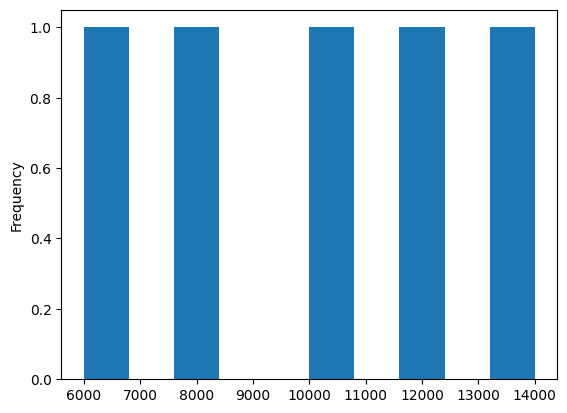

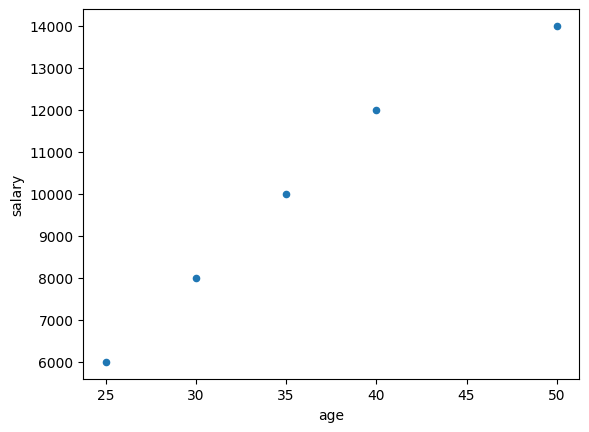

In [118]:
import matplotlib.pyplot as plt
df['salary'].plot(kind="hist")
df.plot(x="age", y="salary", kind="scatter")
plt.show()

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    5 non-null      object
 1   sales   5 non-null      int64 
 2   salary  5 non-null      int64 
 3   age     5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 292.0+ bytes


In [120]:
categorias = ['sales', 'salary', 'age']
df[categorias].corr()

sales    salary       age
sales   1.000000  0.000000 -0.148649
salary  0.000000  1.000000  0.986394
age    -0.148649  0.986394  1.000000

In [121]:
df[categorias].cov()

sales      salary      age
sales   9250.0         0.0   -137.5
salary     0.0  10000000.0  30000.0
age     -137.5     30000.0     92.5

In [122]:
df.value_counts()

city    sales  salary  age
Lima    200    6000    25     1
        250    10000   35     1
Madrid  150    14000   50     1
        300    8000    30     1
México  400    12000   40     1
Name: count, dtype: int64

In [123]:
df["double_salary"] = np.log(df["salary"] + 1)


In [124]:
df

city  sales  salary  age  double_salary
0    Lima    200    6000   25       8.699681
1  Madrid    300    8000   30       8.987322
2    Lima    250   10000   35       9.210440
3  México    400   12000   40       9.392745
4  Madrid    150   14000   50       9.546884

In [125]:
data = {
    "product": ["A", "A", "B", "B", "C", "C"],
    "month": ["Jan", "Feb", "Jan", "Feb", "Jan", "Feb"],
    "sales": [100, 120, 90, 110, 150, 160]
}
df = pd.DataFrame(data)
df

product month  sales
0       A   Jan    100
1       A   Feb    120
2       B   Jan     90
3       B   Feb    110
4       C   Jan    150
5       C   Feb    160

In [126]:
df.groupby("product")["sales"].sum()

product
A    220
B    200
C    310
Name: sales, dtype: int64

In [127]:
df.groupby("month")["sales"].sum()

month
Feb    390
Jan    340
Name: sales, dtype: int64

In [128]:
# Crecimiento mensual
pivot = df.pivot(index="product", columns="month", values="sales")
pivot["growth"] = pivot["Feb"] - pivot["Jan"]
print(pivot)

month    Feb  Jan  growth
product                  
A        120  100      20
B        110   90      20
C        160  150      10
